In [6]:
import pyrixs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd

from matplotlib import rc, rcParams

In [21]:
major_tick_multiple = 5
minor_tick_multiple = 1
ylabel = 'Temperature (°C)'
xlabel = 'Binding Energy (eV)'
fontsize = 12
labelpad = 5

font_family='Arial'
axes_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5

rc('font',**{'family':'sans-serif','sans-serif':[font_family]})
rc('text', usetex=False)

In [20]:
calibration_data = pd.read_csv('../calibration/channelsToEnergies++.txt', sep=r'\t', engine='python')
calibration_data = np.array(calibration_data.iloc[:,0])

[457.08569, 794.69733]


c:\Users\Isaac\Documents\GitHub\picklerixs\py\pyrixs.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


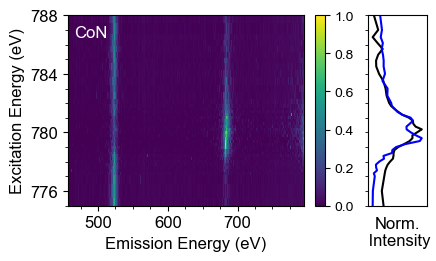

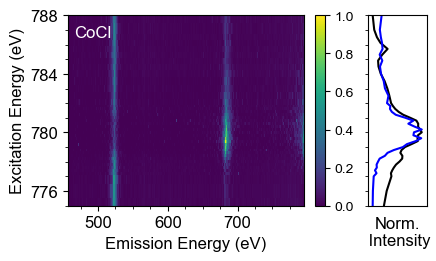

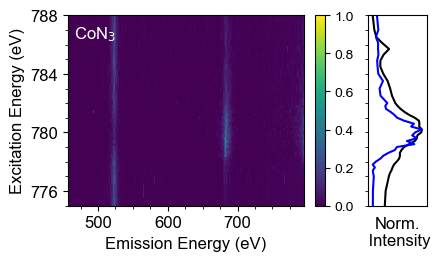

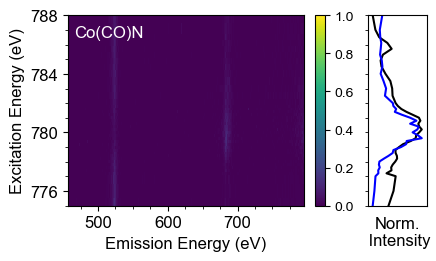

In [59]:
ipfy_lim = [395,800]
xlim = [calibration_data.min(), calibration_data.max()]

dim = [4.25,2.5]

print(xlim)

header_list = ['CoCl','CoN$_{3}$','CoN','Co(CO)N']

dir = '../data/irixs/2024-3-28'
dir_list, info_file_list = pyrixs.Util.bulk_data_read(dir)

rixs_list = [pyrixs.Rixs(dir_list[i], info_file_list[i], calibration_data=calibration_data) for i in [2,4,3,5]]

# rixs0 = pyrixs.Rixs(dir_list[2], info_file_list[2])
# rixs1 = pyrixs.Rixs(dir_list[4], info_file_list[4])

pyrixs.Util.replace_entries(rixs_list[0], rixs_list[1])
# pyrixs.Util.replace_entries(rixs_list[2], rixs_list[3])

rixs_list[0].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=dim, xlim=xlim, header='CoN',
                        x_minor_tick_multiple=25,
                        savefig='../fig/Co-L3-{}-full.svg'.format('CoN'))
# rixs_list[2].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=[4.5,2.5], xlim=xlim, header='Co(CO)N')

rixs_list_new = [rixs_list[0]]
# print(rixs0.df)

# for i in range(len(dir_list)):
for i in [0,1,3]:
    dir = dir_list[i]
    info_file = info_file_list[i]
    rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data)
    # if i == 2:
    #     izero = 'Izero 2'
    # else:
    #     izero = 'Izero'
    # if i == 2:
    #     drop = [17,19,20]
    izero = 'Izero'
    if i == 2:
        drop = [17,19]
    else:
        drop = []
    if i not in [0,1,2,3]:
        header = None
    else:
        header = header_list[i]
    rixs.plot_mrixs(show=False, plot_ipfy=True, ipfy_lim=ipfy_lim, izero=izero, drop=drop, dim=dim, xlim=xlim, header=header,
                    x_minor_tick_multiple=25,
                    savefig='../fig/Co-L3-{}-full.svg'.format(header))
    rixs_list_new.append(rixs)

c:\Users\Isaac\Documents\GitHub\picklerixs\py\pyrixs.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


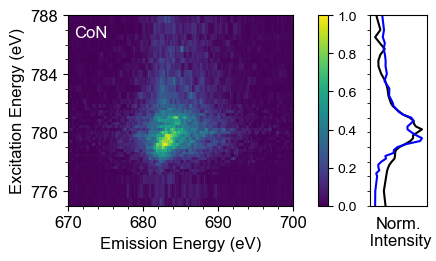

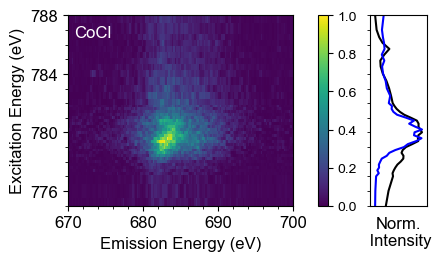

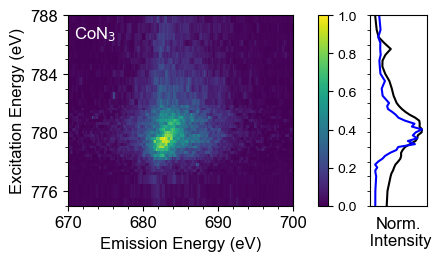

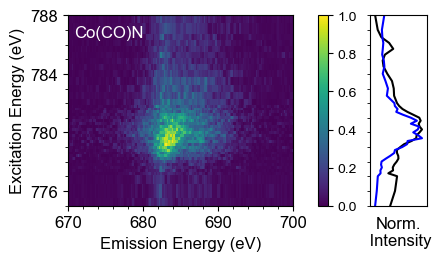

In [60]:
ipfy_lim = [395,800]
xlim = [670, 700]
x_minor_tick_multiple = 2

header_list = ['CoCl','CoN$_{3}$','CoN','Co(CO)N']

dir = '../data/irixs/2024-3-28'
dir_list, info_file_list = pyrixs.Util.bulk_data_read(dir)

rixs_list = [pyrixs.Rixs(dir_list[i], info_file_list[i], calibration_data=calibration_data) for i in [2,4,3,5]]

# rixs0 = pyrixs.Rixs(dir_list[2], info_file_list[2])
# rixs1 = pyrixs.Rixs(dir_list[4], info_file_list[4])

pyrixs.Util.replace_entries(rixs_list[0], rixs_list[1])
# pyrixs.Util.replace_entries(rixs_list[2], rixs_list[3])

rixs_list[0].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=dim, xlim=xlim, header='CoN',
                        x_minor_tick_multiple=x_minor_tick_multiple,
                        savefig='../fig/Co-L3-{}-zoomed.svg'.format('CoN'))
# rixs_list[2].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=[4.5,2.5], xlim=xlim, header='Co(CO)N')

rixs_list_new = [rixs_list[0]]
# print(rixs0.df)

# for i in range(len(dir_list)):
for i in [0,1,3]:
    dir = dir_list[i]
    info_file = info_file_list[i]
    rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data)
    # if i == 2:
    #     izero = 'Izero 2'
    # else:
    #     izero = 'Izero'
    # if i == 2:
    #     drop = [17,19,20]
    izero = 'Izero'
    if i == 2:
        drop = [17,19]
    else:
        drop = []
    if i not in [0,1,2,3]:
        header = None
    else:
        header = header_list[i]
    rixs.plot_mrixs(show=False, plot_ipfy=True, ipfy_lim=ipfy_lim, izero=izero, drop=drop, dim=dim, xlim=xlim, header=header,
                    x_minor_tick_multiple=x_minor_tick_multiple,
                    savefig='../fig/Co-L3-{}-zoomed.svg'.format(header))
    rixs_list_new.append(rixs)

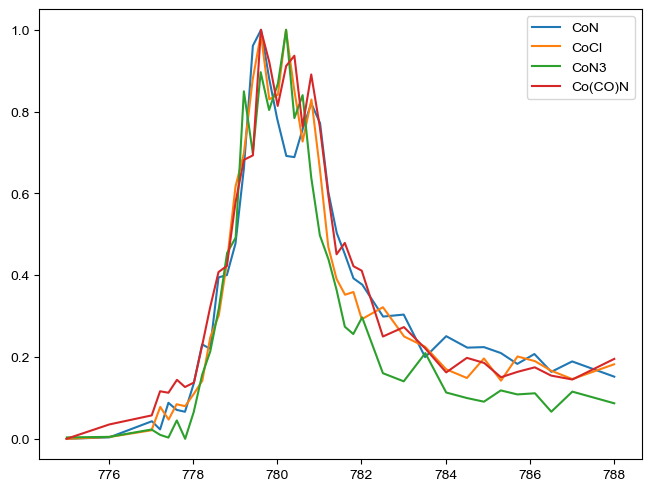

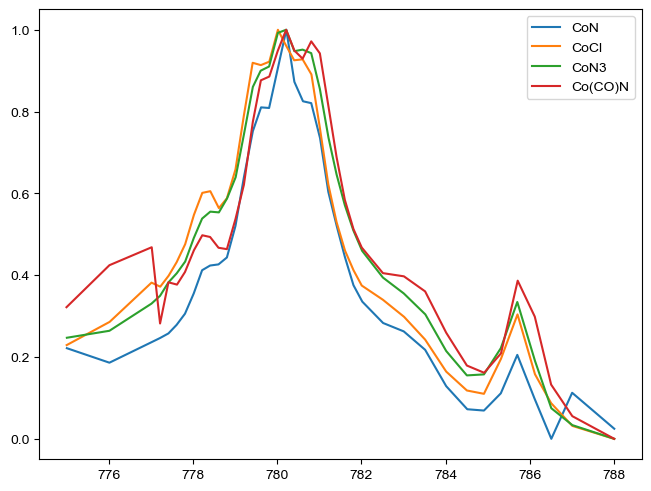

In [61]:
fig, ax = plt.subplots(layout='constrained')

for rixs in rixs_list_new:
    ax.plot(rixs.y, rixs.ipfy)
ax.legend(['CoN','CoCl','CoN3','Co(CO)N'])

i = 0    
fig, ax = plt.subplots(layout='constrained')
for rixs in rixs_list_new:
    if i == 0:
        ax.plot(rixs.y_masked, rixs.tfy)
    else:
        ax.plot(rixs.y, rixs.tfy)
    i += 1
ax.legend(['CoN','CoCl','CoN3','Co(CO)N'])